In [1]:
import pandas as pd

In [2]:
raw = pd.read_pickle('sentiment.pickle')
raw

,날짜,제목,본문,링크,산업,sentiment_score
9,2025-10-01,"캐너코드,""테슬라 3분기 인도 48만대 넘어""…목표주가도 상향",이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글로벌마켓에 게재된 기사입니다. ...,https://n.news.naver.com/mnews/article/015/000...,자동차,0.855592
16,2025-10-01,트럼프 큰소리에도 美자동차 업체는 공장 구조조정중,이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글로벌마켓에 게재된 기사입니다. ...,https://n.news.naver.com/mnews/article/015/000...,자동차,0.449221
19,2025-10-01,[이슈프리즘] 韓 제조업 미래는 누가 고민하나,“중국이 제조 혁신에 나섰다고 화웨이 같은 회사가 자동차 등 다른 분야에서 곧 나올...,https://n.news.naver.com/mnews/article/015/000...,자동차,0.743420
47,2025-10-01,"""수소도시 만들어 수소산업 육성하자""",국회수소경제포럼 대표의원인 정태호 더불어민주당 의원이 수소산업 경쟁력 확보를 위한 ...,https://n.news.naver.com/mnews/article/008/000...,자동차,0.854099
48,2025-10-01,"국토부, 서울 중화5구역 점검… '공공 정비사업' 속도낸다",공공성 강화 중심의 '9·7 공급대책'을 내놓은 정부가 공공정비사업 사업성을 확대하...,https://n.news.naver.com/mnews/article/008/000...,건설,0.847423
...,...,...,...,...,...,...
206635,2025-12-21,3200명 정신없는 건설현장… AI·통합관제로 안전 지킨다[현장르포],지난 19일 찾은 서울 서초구 디에이치 클래스트(반포주공1단지 1·2·4주구 재건축...,https://n.news.naver.com/mnews/article/014/000...,건설,0.963720
206751,2025-12-21,[AI헬스케어] 정부 주도 AI의료 기술 개발...닥터앤서3.0 참여 기업은,[이데일리 김승권 기자] 정부 주도 의료 인공지능(AI) 사업 ‘닥터앤서’가 3.0...,https://n.news.naver.com/mnews/article/018/000...,헬스케어,0.882646
206814,2025-12-21,살 뺄 때만 먹는 줄 알았는데…알고보니 '완전식품'인 고구마의 놀라운 효능 [건강UP],[서울경제] 몸·마음·생활… 무분별한 정보는 많고 건강해야 할 곳도 많습니다. ...,https://n.news.naver.com/mnews/article/011/000...,헬스케어,0.980757
206831,2025-12-21,[미리보는 이데일리 신문]차세대 비만약 핵심기술 K바이오가 장악,[이데일리 박지애 기자] 다음은 22일자 이데일리 신문 주요 기사다. △1면 -...,https://n.news.naver.com/mnews/article/018/000...,헬스케어,0.364675


In [3]:
# 자동차
sent_auto = raw[raw['산업']=='자동차']
# sent_car

#날짜별 sentiment 평균내기
sent_auto_ave = sent_auto.groupby('날짜')['sentiment_score'].mean()
sent_auto_ave

# 날짜별 기사 수 
sent_auto_amount =  sent_auto.groupby('날짜')['본문'].count()
sent_auto_amount.columns = ['날짜', 'Article_Count']

# to df
sent_auto_ave = sent_auto_ave.reset_index()
sent_auto_ave.columns = ['날짜', 'Ave_sentiment']

#merge
sent_auto_final = pd.merge(sent_auto_ave, sent_auto_amount, on='날짜')
sent_auto_final

,날짜,Ave_sentiment,본문
0,2025-10-01,0.771693,195
1,2025-10-02,0.816091,132
2,2025-10-03,0.437682,34
3,2025-10-04,0.444501,23
4,2025-10-05,0.574679,22
...,...,...,...
77,2025-12-17,0.760969,272
78,2025-12-18,0.697370,258
79,2025-12-19,0.833648,129
80,2025-12-20,0.451038,21


In [4]:
# 건설
sent_const = raw[raw['산업']=='건설']
# sent_const

#날짜별 sentiment 평균내기
sent_const_ave = sent_const.groupby('날짜')['sentiment_score'].mean()
# sent_const_ave

# 날짜별 기사 수 
sent_const_amount =  sent_const.groupby('날짜')['본문'].count()
sent_const_amount.columns = ['날짜', 'Article_Count']

# to df
sent_const_ave = sent_const_ave.reset_index()
sent_const_ave.columns = ['날짜', 'Ave_sentiment']
sent_const_ave

#merge
sent_const_final = pd.merge(sent_const_ave, sent_const_amount, on='날짜')
sent_const_final

,날짜,Ave_sentiment,본문
0,2025-10-01,0.696901,84
1,2025-10-02,0.669425,40
2,2025-10-03,0.101311,15
3,2025-10-04,0.542672,4
4,2025-10-05,0.082111,8
...,...,...,...
77,2025-12-17,0.684655,92
78,2025-12-18,0.600379,157
79,2025-12-19,0.784986,87
80,2025-12-20,0.574031,17


In [5]:
# 헬스케어
sent_health = raw[raw['산업']=='헬스케어']
sent_health

#날짜별 sentiment 평균내기
sent_health_ave = sent_health.groupby('날짜')['sentiment_score'].mean()
sent_health_ave

# 날짜별 기사 수 
sent_health_amount =  sent_health.groupby('날짜')['본문'].count()
sent_health_amount.columns = ['날짜', 'Article_Count']

# to df
sent_health_ave = sent_health_ave.reset_index()
sent_health_ave.columns = ['날짜', 'Ave_sentiment']
sent_health_ave

#merge
sent_health_final = pd.merge(sent_health_ave, sent_health_amount, on='날짜')
sent_health_final

,날짜,Ave_sentiment,본문
0,2025-10-01,0.840384,158
1,2025-10-02,0.842149,108
2,2025-10-03,0.487421,22
3,2025-10-04,0.436878,12
4,2025-10-05,0.424447,10
...,...,...,...
77,2025-12-17,0.783878,241
78,2025-12-18,0.856880,292
79,2025-12-19,0.800704,192
80,2025-12-20,0.541500,19


In [6]:
sent_health_final['industry'] = '헬스케어'
sent_auto_final['industry'] = '자동차'
sent_const_final['industry'] = '건설'

total_sent = pd.concat([sent_health_final, sent_auto_final, sent_const_final])
total_sent

,날짜,Ave_sentiment,본문,industry
0,2025-10-01,0.840384,158,헬스케어
1,2025-10-02,0.842149,108,헬스케어
2,2025-10-03,0.487421,22,헬스케어
3,2025-10-04,0.436878,12,헬스케어
4,2025-10-05,0.424447,10,헬스케어
...,...,...,...,...
77,2025-12-17,0.684655,92,건설
78,2025-12-18,0.600379,157,건설
79,2025-12-19,0.784986,87,건설
80,2025-12-20,0.574031,17,건설


In [7]:
total_sent.to_pickle("daily_sentiment.pickle")

In [8]:
import pandas as pd
total_sent = pd.read_pickle('daily_sentiment.pickle')

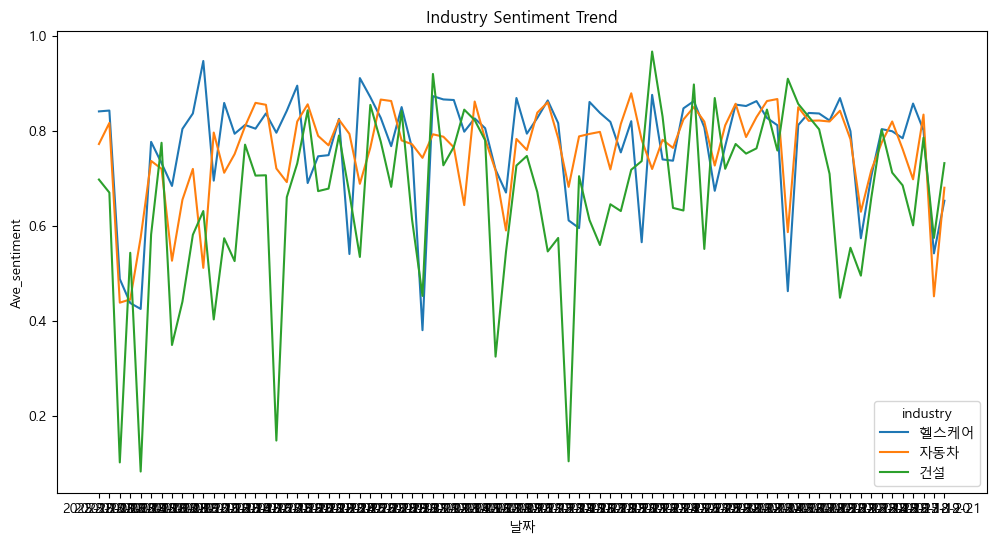

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1. 한글 폰트 및 마이너스 기호 설정
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_sent, x='날짜', y='Ave_sentiment', hue='industry')
plt.title('Industry Sentiment Trend')
plt.show()

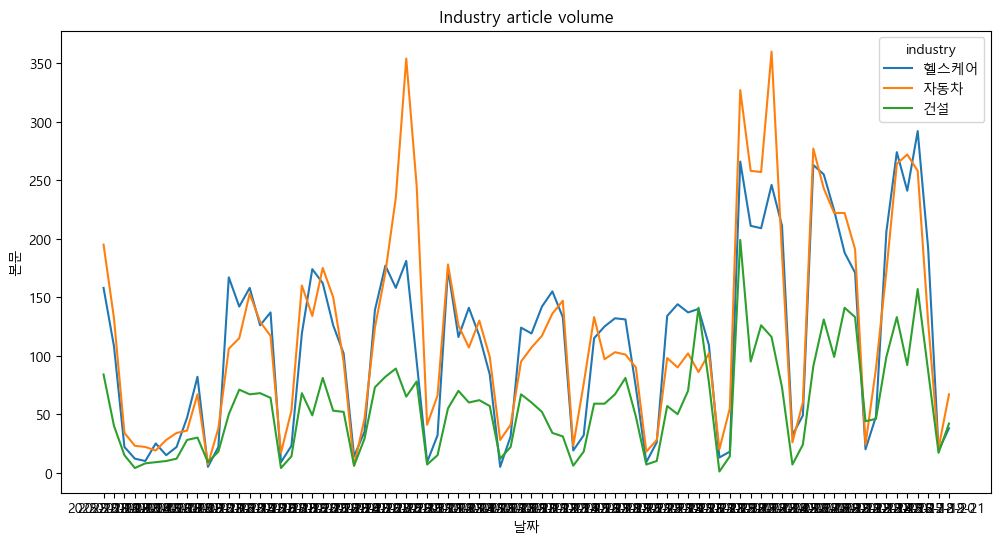

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_sent, x='날짜', y='본문', hue='industry')
plt.title('Industry article volume')
plt.show()

In [11]:
# 기준 평균 정하기 오늘부터 역으로 *일치의 평균

# # 1주일
# n=7
# # 15일
# n=15
# # 30일
# n=30
n = int(input("*일치"))
new_df = total_sent.groupby('industry')['Ave_sentiment'].apply(lambda x: x.tail(n).mean()).reset_index()
new_df

*일치20


,industry,Ave_sentiment
0,건설,0.713265
1,자동차,0.761282
2,헬스케어,0.765060


In [12]:
import pandas as pd
import numpy as np

n = int(input("변동성을 확인할 기준 기간(n일)을 입력하세요: "))

# 1.분석용 DF 생성

df_analysis = total_sent[['날짜', 'industry', 'Ave_sentiment']].copy()

# 2. 분석용 DF에만 계산 컬럼 추가
# groupby와 transform을 쓰되, 결과만 df_analysis에 저장
group = df_analysis.groupby('industry')['Ave_sentiment']

df_analysis['MA'] = group.transform(lambda x: x.rolling(window=n).mean())
df_analysis['STD'] = group.transform(lambda x: x.rolling(window=n).std())

# 3. 상/하한선 및 이상치 계산
df_analysis['Upper'] = df_analysis['MA'] + (2 * df_analysis['STD'])
df_analysis['Lower'] = df_analysis['MA'] - (2 * df_analysis['STD'])

# 4. 이상치 판별
df_analysis['Is_Outlier'] = (df_analysis['Ave_sentiment'] > df_analysis['Upper']) | \
                            (df_analysis['Ave_sentiment'] < df_analysis['Lower'])

# 5. 이상치만 모은 별도 데이터프레임
outliers = df_analysis[df_analysis['Is_Outlier'] == True].copy()

변동성을 확인할 기준 기간(n일)을 입력하세요: 20


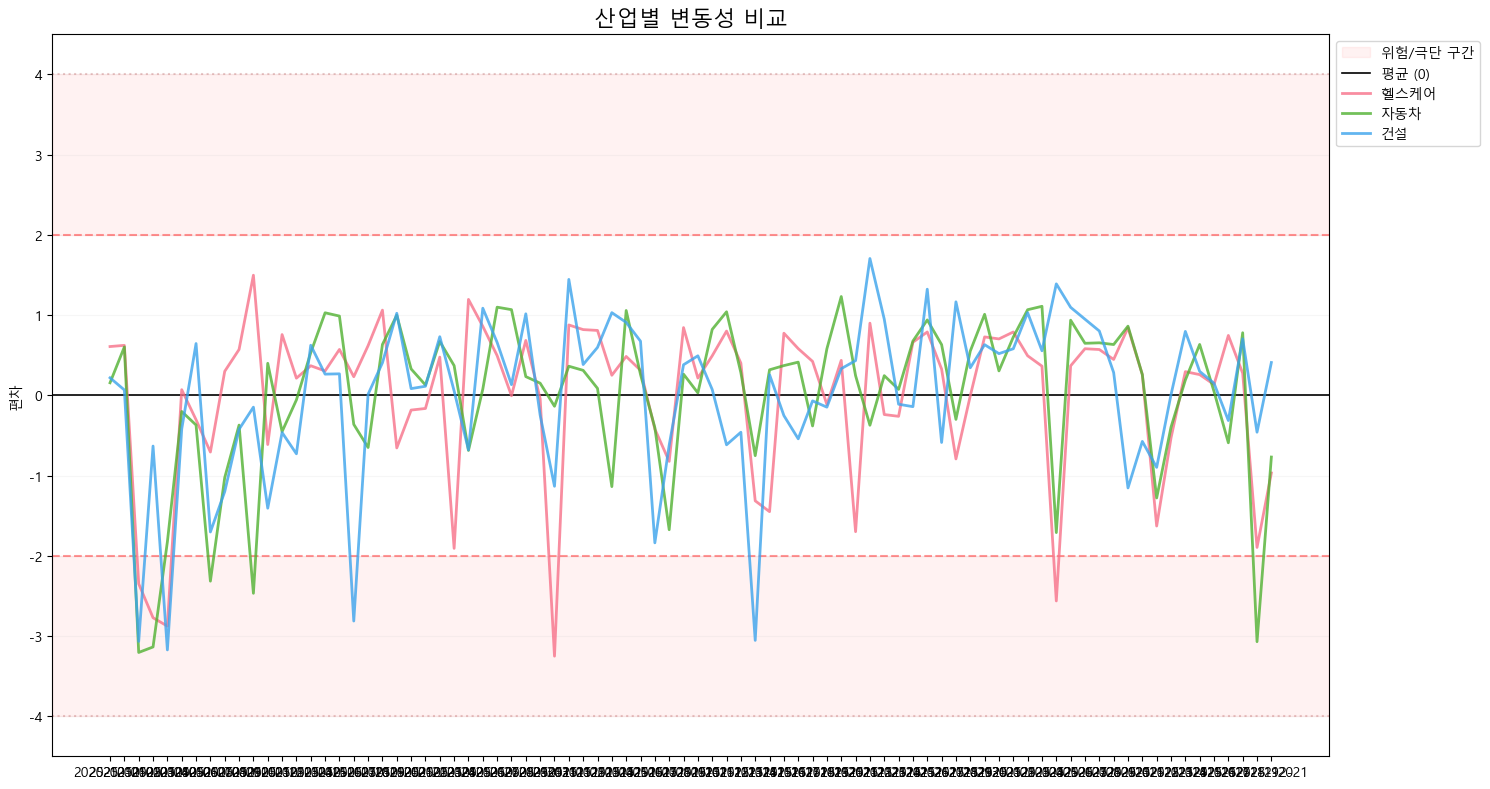

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Z-Score 계산
df_analysis['Z_Score'] = df_analysis.groupby('industry')['Ave_sentiment'].transform(lambda x: (x - x.mean()) / x.std())

# 1. 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 8))

# 2. 배경 구간 색칠 (axhspan 사용)
plt.axhspan(2, 4, color='red', alpha=0.05, label='위험/극단 구간')
plt.axhspan(-4, -2, color='red', alpha=0.05)

# 3. 가이드 수평선
plt.axhline(0, color='black', linewidth=1.2, label='평균 (0)')
plt.axhline(2, color='red', linestyle='--', alpha=0.4)
plt.axhline(-2, color='red', linestyle='--', alpha=0.4)
plt.axhline(4, color='darkred', linestyle=':', alpha=0.2)
plt.axhline(-4, color='darkred', linestyle=':', alpha=0.2)

# 4. 산업별 Z-Score 선 그리기
industries = df_analysis['industry'].unique()
colors = sns.color_palette("husl", len(industries))

for i, industry in enumerate(industries):
    df_ind = df_analysis[df_analysis['industry'] == industry]
    plt.plot(df_ind['날짜'], df_ind['Z_Score'], label=industry, color=colors[i], lw=2, alpha=0.8)

# 5. 그래프 꾸미기
plt.title('산업별 변동성 비교', fontsize=16)
plt.ylabel('편차')
plt.ylim(-4.5, 4.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, axis='y', alpha=0.1)

plt.tight_layout()
plt.show()

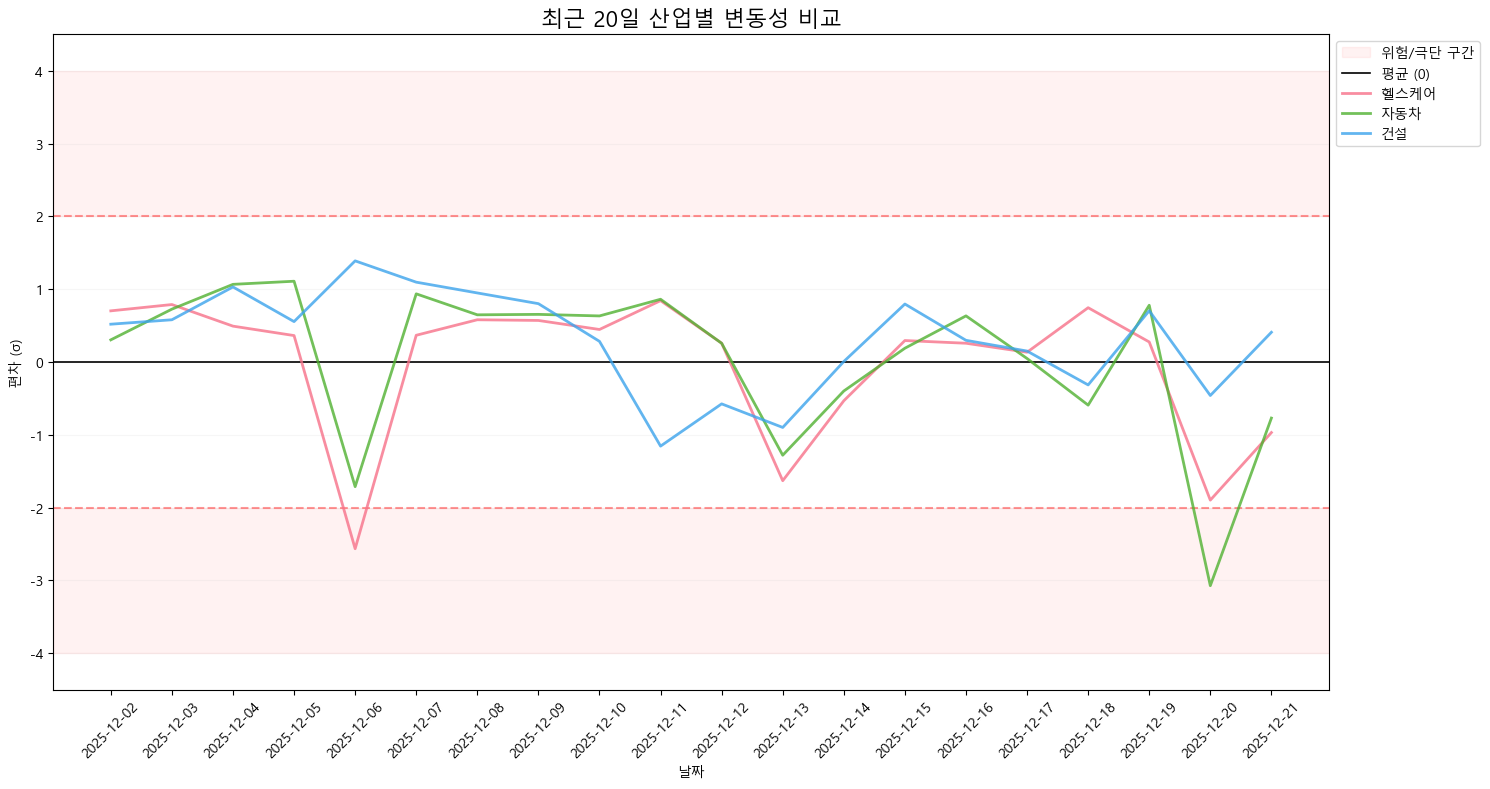

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Z-Score 계산
df_analysis['Z_Score'] = df_analysis.groupby('industry')['Ave_sentiment'].transform(lambda x: (x - x.mean()) / x.std())

# 1. 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 8))

# 2. 배경 구간 색칠
plt.axhspan(2, 4, color='red', alpha=0.05, label='위험/극단 구간')
plt.axhspan(-4, -2, color='red', alpha=0.05)

# 3. 가이드 수평선
plt.axhline(0, color='black', linewidth=1.2, label='평균 (0)')
plt.axhline(2, color='red', linestyle='--', alpha=0.4)
plt.axhline(-2, color='red', linestyle='--', alpha=0.4)

# 4. 산업별 Z-Score 선 그리기 (최신 n일치만!)
industries = df_analysis['industry'].unique()
colors = sns.color_palette("husl", len(industries))

for i, industry in enumerate(industries):
    # 해당 산업 데이터 필터링 후, 최신 n일치만 tail(n)으로 추출
    df_ind = df_analysis[df_analysis['industry'] == industry].tail(n)
    
    plt.plot(df_ind['날짜'], df_ind['Z_Score'], label=industry, color=colors[i], lw=2, alpha=0.8)

# 5. 그래프 꾸미기
plt.title(f'최근 {n}일 산업별 변동성 비교', fontsize=16)
plt.ylabel('편차 (σ)')
plt.xlabel('날짜')
plt.ylim(-4.5, 4.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, axis='y', alpha=0.1)

# x축 날짜 라벨이 겹치지 않게 회전 (데이터가 많을 경우 대비)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()